In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/EaseTrip Flight Price Data.csv')
data.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,53f192419756cfa95baa4745067354f5,2020-04-01 01:23:42 +0000,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,SG-8751|SG-426,23Apr2020,13:10,23Apr2020,22:00,08h 50m,1,4378.0
1,7bb845050e88cc6a4f17abf24794c73b,2020-04-01 00:59:51 +0000,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,UK-851|UK-812|UK-885,18Apr2020,07:00,18Apr2020,19:10,12h 10m,2,7465.0
2,c9a84cc24d8a350eb41555c7bb76def6,2020-04-01 00:56:35 +0000,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,AI-18|AI-401|AI-729,25Apr2020,07:10,26Apr2020,11:05,27h 55m,2,6179.0
3,0c0a87ac2229b8c3f1b322baf1fc9f4e,2020-04-01 00:42:35 +0000,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,SG-254|SG-8561,16Apr2020,18:00,17Apr2020,11:10,17h 10m,1,5226.0
4,b8f8af12fd6d9bf2f24389f26488478c,2020-04-01 01:52:13 +0000,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,6E-5321|6E-323,18Apr2020,07:25,18Apr2020,13:35,06h 10m,1,3333.0


## **Dropping Columns**

In [4]:
data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Source', 'Layover1', 'Layover2',
       'Layover3', 'Destination', 'Flight Operator', 'Flight Number',
       'Departure Date', 'Departure Time', 'Arrival Date', 'Arrival Time',
       'Total Time', 'Number Of Stops', 'Fare'],
      dtype='object')

In [5]:
data.drop(['Uniq Id','Crawl Timestamp','Flight Number',],axis=1,inplace=True)

In [6]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,23Apr2020,13:10,23Apr2020,22:00,08h 50m,1,4378.0
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,18Apr2020,07:00,18Apr2020,19:10,12h 10m,2,7465.0
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,25Apr2020,07:10,26Apr2020,11:05,27h 55m,2,6179.0
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,16Apr2020,18:00,17Apr2020,11:10,17h 10m,1,5226.0
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,18Apr2020,07:25,18Apr2020,13:35,06h 10m,1,3333.0


## **Dealing With Missing Values**

In [7]:
data.shape

(30000, 13)

In [8]:
data.isna().sum()

Source                 0
Layover1            1640
Layover2           17848
Layover3           29970
Destination            0
Flight Operator        0
Departure Date         0
Departure Time         0
Arrival Date           0
Arrival Time           0
Total Time             0
Number Of Stops        0
Fare                   0
dtype: int64

# **Cleaning the data**

In [9]:
data.dtypes

Source              object
Layover1            object
Layover2            object
Layover3            object
Destination         object
Flight Operator     object
Departure Date      object
Departure Time      object
Arrival Date        object
Arrival Time        object
Total Time          object
Number Of Stops      int64
Fare               float64
dtype: object

In [10]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [11]:
for i in ['Departure Date','Departure Time','Arrival Date','Arrival Time']:
    change_into_datetime(i)

In [12]:
data.dtypes

Source                     object
Layover1                   object
Layover2                   object
Layover3                   object
Destination                object
Flight Operator            object
Departure Date     datetime64[ns]
Departure Time     datetime64[ns]
Arrival Date       datetime64[ns]
Arrival Time       datetime64[ns]
Total Time                 object
Number Of Stops             int64
Fare                      float64
dtype: object

In [13]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,2020-04-23,2021-07-08 13:10:00,2020-04-23,2021-07-08 22:00:00,08h 50m,1,4378.0
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,2020-04-18,2021-07-08 07:00:00,2020-04-18,2021-07-08 19:10:00,12h 10m,2,7465.0
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,2020-04-25,2021-07-08 07:10:00,2020-04-26,2021-07-08 11:05:00,27h 55m,2,6179.0
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,2020-04-16,2021-07-08 18:00:00,2020-04-17,2021-07-08 11:10:00,17h 10m,1,5226.0
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,2020-04-18,2021-07-08 07:25:00,2020-04-18,2021-07-08 13:35:00,06h 10m,1,3333.0


In [14]:
data['departure_day'] = data['Departure Date'].dt.day
data['departure_month'] = data['Departure Date'].dt.month
data['arrival_day'] = data['Arrival Date'].dt.day
data['arrival_month'] = data['Arrival Date'].dt.month

In [15]:
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

In [16]:
drop_col(data,'Departure Date')
drop_col(data,'Arrival Date')

In [17]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Departure Time,Arrival Time,Total Time,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,2021-07-08 13:10:00,2021-07-08 22:00:00,08h 50m,1,4378.0,23,4,23,4
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,2021-07-08 07:00:00,2021-07-08 19:10:00,12h 10m,2,7465.0,18,4,18,4
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,2021-07-08 07:10:00,2021-07-08 11:05:00,27h 55m,2,6179.0,25,4,26,4
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,2021-07-08 18:00:00,2021-07-08 11:10:00,17h 10m,1,5226.0,16,4,17,4
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,2021-07-08 07:25:00,2021-07-08 13:35:00,06h 10m,1,3333.0,18,4,18,4


In [18]:
def extract_time(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute

In [19]:
extract_time(data,'Departure Time')
extract_time(data,'Arrival Time')
drop_col(data,'Departure Time')
drop_col(data,'Arrival Time')

In [20]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Total Time,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,08h 50m,1,4378.0,23,4,23,4,13,10,22,0
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,12h 10m,2,7465.0,18,4,18,4,7,0,19,10
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,27h 55m,2,6179.0,25,4,26,4,7,10,11,5
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,17h 10m,1,5226.0,16,4,17,4,18,0,11,10
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,06h 10m,1,3333.0,18,4,18,4,7,25,13,35


In [21]:
def flight_dep_time(X):
    if int(X) >= 0 and int(X) < 6:
        return 'mid_night'
    elif int(X) >= 6 and int(X) < 12:
        return 'morning'
    elif int(X) >= 12 and int(X) < 18:
        return 'afternoon'
    elif int(X) >= 18 and int(X) < 24:
        return 'evening'

In [28]:
data['flight_time'] = data['Departure Time_hour'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

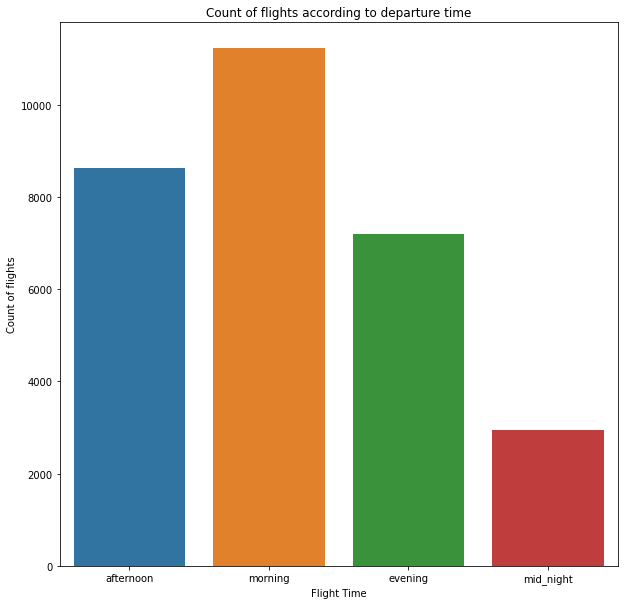

In [25]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = data)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Price of ticket')

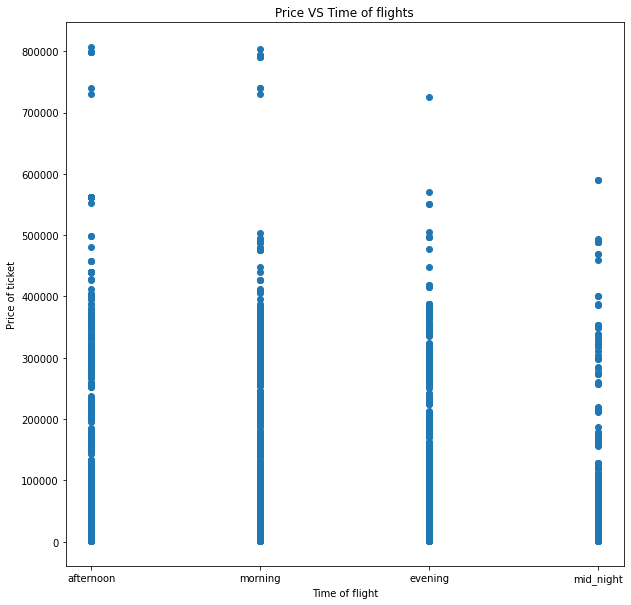

In [30]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Time of flights')
plt.scatter(data['flight_time'], data['Fare'])
plt.xlabel('Time of flight')
plt.ylabel('Price of ticket')

In [32]:
drop_col(data,'flight_time')
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Total Time,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,08h 50m,1,4378.0,23,4,23,4,13,10,22,0
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,12h 10m,2,7465.0,18,4,18,4,7,0,19,10
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,27h 55m,2,6179.0,25,4,26,4,7,10,11,5
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,17h 10m,1,5226.0,16,4,17,4,18,0,11,10
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,06h 10m,1,3333.0,18,4,18,4,7,25,13,35


In [33]:
def hour(x):
    return x.split(' ')[0][0:-1] 
def minute(x):
    return x.split(' ')[1][0:-1]

In [34]:
data['Duration_hour']=data['Total Time'].apply(hour)
data['Duration_minute']=data['Total Time'].apply(minute)

In [35]:
drop_col(data,'Total Time')

In [36]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,1,4378.0,23,4,23,4,13,10,22,0,08,50
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,2,7465.0,18,4,18,4,7,0,19,10,12,10
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,2,6179.0,25,4,26,4,7,10,11,5,27,55
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,1,5226.0,16,4,17,4,18,0,11,10,17,10
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,1,3333.0,18,4,18,4,7,25,13,35,06,10


In [62]:
data.departure_month.value_counts()

4    29998
Name: departure_month, dtype: int64

In [63]:
drop_col(data,'departure_month')
drop_col(data,'arrival_month')

In [64]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Number Of Stops,Fare,departure_day,arrival_day,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute,Airline
0,Delhi,Patna,NaN,NaN,Guwahati,1,4378.0,23,23,13,10,22,0,8,50,SpiceJet
1,Mumbai,Bangalore,Delhi,NaN,Kochi,2,7465.0,18,18,7,0,19,10,12,10,Vistara
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,2,6179.0,25,26,7,10,11,5,27,55,Air India
3,Kolkata,Delhi,NaN,NaN,Kochi,1,5226.0,16,17,18,0,11,10,17,10,SpiceJet
4,Indore,Mumbai,NaN,NaN,Chennai,1,3333.0,18,18,7,25,13,35,6,10,Indigo


In [37]:
print(data['Duration_hour'][18250])
data['Duration_hour'][7686]

1.03


'1.01'

In [38]:
data = data.drop(data.index[[7686,18250]])

In [39]:
data.shape

(29998, 18)

In [40]:
data['Duration_hour'].value_counts()

07    1508
06    1491
05    1395
08    1375
09    1099
      ... 
62       2
73       2
2        1
69       1
60       1
Name: Duration_hour, Length: 72, dtype: int64

In [41]:
data.dtypes

Source                    object
Layover1                  object
Layover2                  object
Layover3                  object
Destination               object
Flight Operator           object
Number Of Stops            int64
Fare                     float64
departure_day              int64
departure_month            int64
arrival_day                int64
arrival_month              int64
Departure Time_hour        int64
Departure Time_minute      int64
Arrival Time_hour          int64
Arrival Time_minute        int64
Duration_hour             object
Duration_minute           object
dtype: object

In [42]:
data['Duration_hour'] = data['Duration_hour'].astype('int')
data['Duration_minute'] = data['Duration_minute'].astype('int')

In [43]:
def splitname(x):
    return x.split('|')[0]

In [44]:
data['Airline'] = data['Flight Operator'].apply(splitname)

In [45]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute,Airline
0,Delhi,Patna,NaN,NaN,Guwahati,SpiceJet|SpiceJet,1,4378.0,23,4,23,4,13,10,22,0,8,50,SpiceJet
1,Mumbai,Bangalore,Delhi,NaN,Kochi,Vistara|Vistara|Vistara,2,7465.0,18,4,18,4,7,0,19,10,12,10,Vistara
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,Air India|Air India|Air India,2,6179.0,25,4,26,4,7,10,11,5,27,55,Air India
3,Kolkata,Delhi,NaN,NaN,Kochi,SpiceJet|SpiceJet,1,5226.0,16,4,17,4,18,0,11,10,17,10,SpiceJet
4,Indore,Mumbai,NaN,NaN,Chennai,Indigo|Indigo,1,3333.0,18,4,18,4,7,25,13,35,6,10,Indigo


In [46]:
drop_col(data,'Flight Operator')

In [47]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Number Of Stops,Fare,departure_day,departure_month,arrival_day,arrival_month,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute,Airline
0,Delhi,Patna,NaN,NaN,Guwahati,1,4378.0,23,4,23,4,13,10,22,0,8,50,SpiceJet
1,Mumbai,Bangalore,Delhi,NaN,Kochi,2,7465.0,18,4,18,4,7,0,19,10,12,10,Vistara
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,2,6179.0,25,4,26,4,7,10,11,5,27,55,Air India
3,Kolkata,Delhi,NaN,NaN,Kochi,1,5226.0,16,4,17,4,18,0,11,10,17,10,SpiceJet
4,Indore,Mumbai,NaN,NaN,Chennai,1,3333.0,18,4,18,4,7,25,13,35,6,10,Indigo


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text major ticklabel objects>)

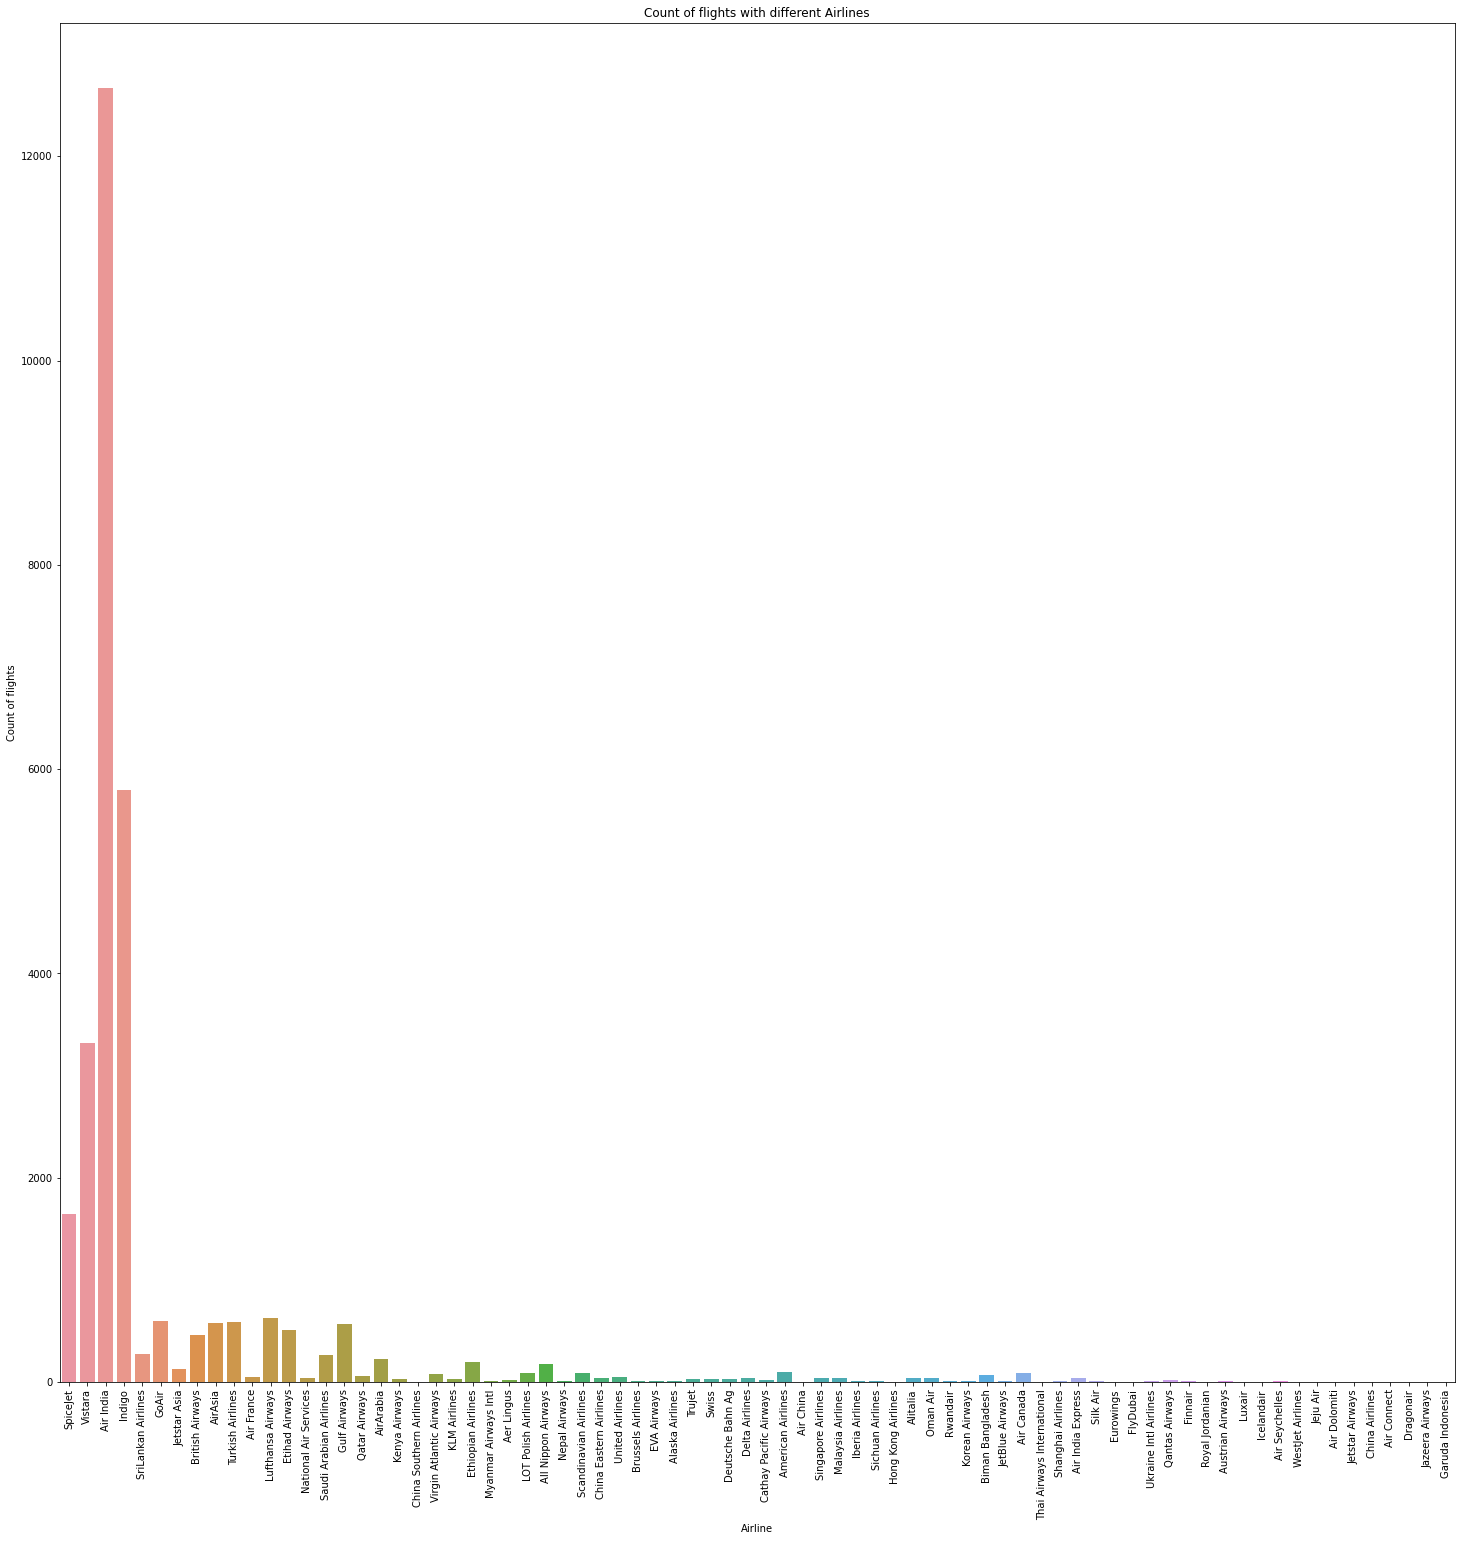

In [50]:
plt.figure(figsize = (25, 25))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [51]:
data['Airline'].unique()

array(['SpiceJet', 'Vistara', 'Air India', 'Indigo', 'SriLankan Airlines',
       'GoAir', 'Jetstar Asia', 'British Airways', 'AirAsia',
       'Turkish Airlines', 'Air France', 'Lufthansa Airways',
       'Etihad Airways', 'National Air Services',
       'Saudi Arabian Airlines', 'Gulf Airways', 'Qatar Airways',
       'AirArabia', 'Kenya Airways', 'China Southern Airlines',
       'Virgin Atlantic Airways', 'KLM Airlines', 'Ethiopian Airlines',
       'Myanmar Airways Intl', 'Aer Lingus', 'LOT Polish Airlines',
       'All Nippon Airways', 'Nepal Airways', 'Scandinavian Airlines',
       'China Eastern Airlines', 'United Airlines', 'Brussels Airlines',
       'EVA Airways', 'Alaska Airlines', 'Trujet', 'Swiss',
       'Deutsche Bahn Ag', 'Delta Airlines', 'Cathay Pacific Airways',
       'American Airlines', 'Air China', 'Singapore Airlines',
       'Malaysia Airlines', 'Iberia Airlines', 'Sichuan Airlines',
       'Hong Kong Airlines', 'Alitalia', 'Oman Air', 'Rwandair',
       'Kor

In [53]:
data['Airline'].replace(['Jetstar Asia','Air France','National Air Services','Qatar Airways','Kenya Airways','China Southern Airlines',
       'Virgin Atlantic Airways', 'KLM Airlines',
       'Myanmar Airways Intl', 'Aer Lingus', 'LOT Polish Airlines', 'Nepal Airways', 'Scandinavian Airlines',
       'China Eastern Airlines', 'United Airlines', 'Brussels Airlines',
       'EVA Airways', 'Alaska Airlines', 'Trujet', 'Swiss',
       'Deutsche Bahn Ag', 'Delta Airlines', 'Cathay Pacific Airways',
       'American Airlines', 'Air China', 'Singapore Airlines',
       'Malaysia Airlines', 'Iberia Airlines', 'Sichuan Airlines',
       'Hong Kong Airlines', 'Alitalia', 'Oman Air', 'Rwandair',
       'Korean Airways', 'Biman Bangladesh', 'JetBlue Airways',
       'Air Canada', 'Thai Airways International', 'Shanghai Airlines',
       'Air India Express', 'Silk Air', 'Eurowings', 'FlyDubai',
       'Ukraine Intl Airlines', 'Qantas Airways', 'Finnair',
       'Royal Jordanian', 'Austrian Airways', 'Luxair', 'Icelandair',
       'Air Seychelles', 'WestJet Airlines', 'Jeju Air', 'Air Dolomiti',
       'Jetstar Airways', 'China Airlines', 'Air Connect', 'Dragonair',
       'Jazeera Airways', 'Garuda Indonesia'], 'Another', inplace = True)

In [55]:
data['Airline'].value_counts()

Air India                 12670
Indigo                     5798
Vistara                    3315
SpiceJet                   1649
Another                    1515
Lufthansa Airways           625
GoAir                       599
Turkish Airlines            586
AirAsia                     576
Gulf Airways                569
Etihad Airways              506
British Airways             456
SriLankan Airlines          272
Saudi Arabian Airlines      269
AirArabia                   225
Ethiopian Airlines          192
All Nippon Airways          176
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

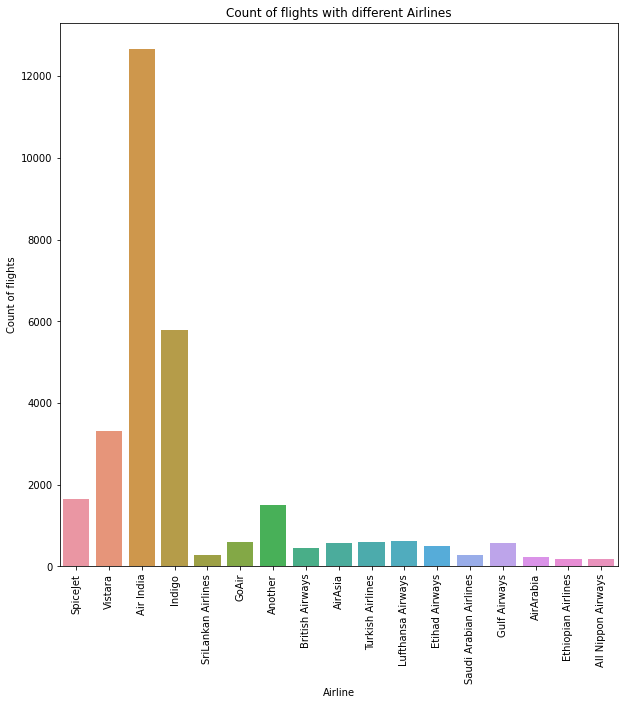

In [57]:
plt.figure(figsize = (10,10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Price of ticket')

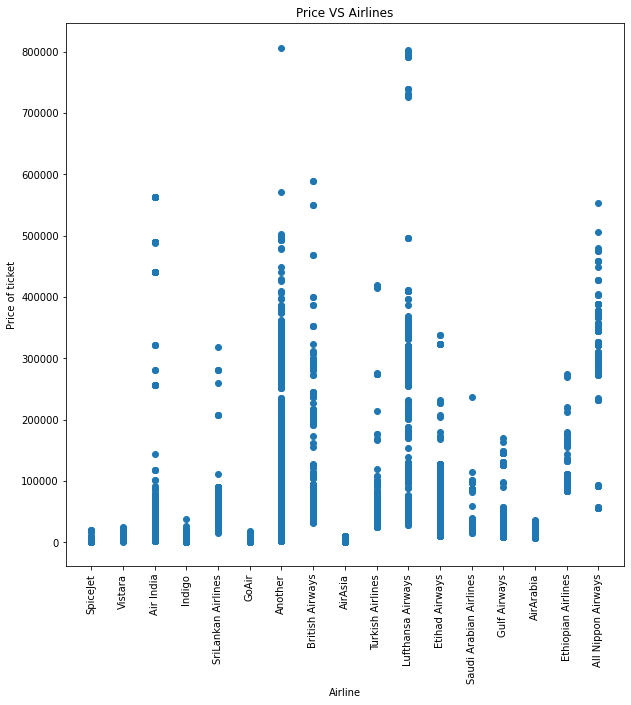

In [66]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Fare'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')

In [67]:
data.dtypes

Source                    object
Layover1                  object
Layover2                  object
Layover3                  object
Destination               object
Number Of Stops            int64
Fare                     float64
departure_day              int64
arrival_day                int64
Departure Time_hour        int64
Departure Time_minute      int64
Arrival Time_hour          int64
Arrival Time_minute        int64
Duration_hour              int64
Duration_minute            int64
Airline                   object
dtype: object

In [68]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Number Of Stops,Fare,departure_day,arrival_day,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute,Airline
0,Delhi,Patna,NaN,NaN,Guwahati,1,4378.0,23,23,13,10,22,0,8,50,SpiceJet
1,Mumbai,Bangalore,Delhi,NaN,Kochi,2,7465.0,18,18,7,0,19,10,12,10,Vistara
2,Ahmedabad,Delhi,Kolkata,NaN,Guwahati,2,6179.0,25,26,7,10,11,5,27,55,Air India
3,Kolkata,Delhi,NaN,NaN,Kochi,1,5226.0,16,17,18,0,11,10,17,10,SpiceJet
4,Indore,Mumbai,NaN,NaN,Chennai,1,3333.0,18,18,7,25,13,35,6,10,Indigo


# **Handling Categorical Data**

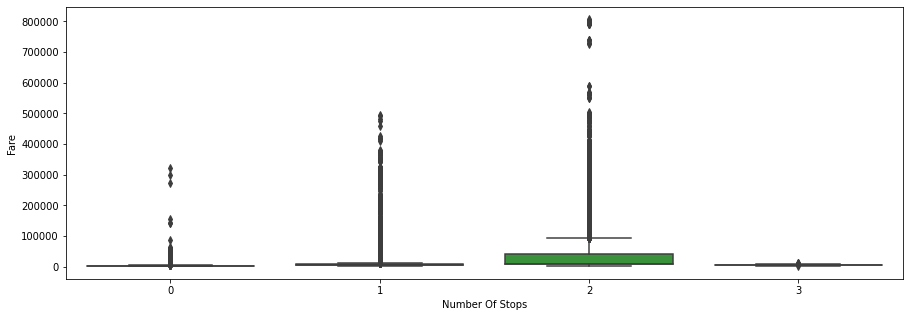

In [69]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Number Of Stops',y='Fare',data=data.sort_values('Fare',ascending=False))

In [74]:
for i in ['Layover1','Layover2','Layover3']:
    data[i].fillna('None',inplace=True)

In [75]:
data.isnull().sum()

Source                   0
Layover1                 0
Layover2                 0
Layover3                 0
Destination              0
Number Of Stops          0
Fare                     0
departure_day            0
arrival_day              0
Departure Time_hour      0
Departure Time_minute    0
Arrival Time_hour        0
Arrival Time_minute      0
Duration_hour            0
Duration_minute          0
Airline                  0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
encoder = LabelEncoder()

In [78]:
data.columns

Index(['Source', 'Layover1', 'Layover2', 'Layover3', 'Destination',
       'Number Of Stops', 'Fare', 'departure_day', 'arrival_day',
       'Departure Time_hour', 'Departure Time_minute', 'Arrival Time_hour',
       'Arrival Time_minute', 'Duration_hour', 'Duration_minute', 'Airline'],
      dtype='object')

In [79]:
for i in ['Source', 'Layover1', 'Layover2', 'Layover3', 'Destination','Airline']:
    data[i]=encoder.fit_transform(data[i])

In [80]:
data['Number Of Stops'].unique()

array([1, 2, 0, 3])

In [81]:
data.head()

,Source,Layover1,Layover2,Layover3,Destination,Number Of Stops,Fare,departure_day,arrival_day,Departure Time_hour,Departure Time_minute,Arrival Time_hour,Arrival Time_minute,Duration_hour,Duration_minute,Airline
0,44,105,50,9,25,1,4378.0,23,23,13,10,22,0,8,50,13
1,107,16,21,9,44,2,7465.0,18,18,7,0,19,10,12,10,16
2,6,37,38,9,25,2,6179.0,25,26,7,10,11,5,27,55,0
3,83,37,50,9,44,1,5226.0,16,17,18,0,11,10,17,10,13
4,65,89,50,9,13,1,3333.0,18,18,7,25,13,35,6,10,10


## **Handling Outliers**

In [82]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

In [83]:
max(data['Fare'])

806878.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


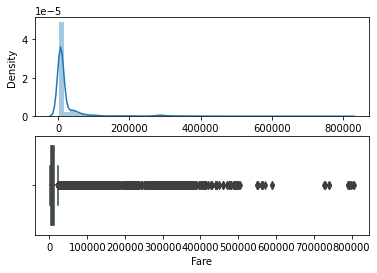

In [84]:
plot(data,'Fare')

In [85]:
data['Fare'] = np.where(data['Fare']>=100000,data['Fare'].median(),data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


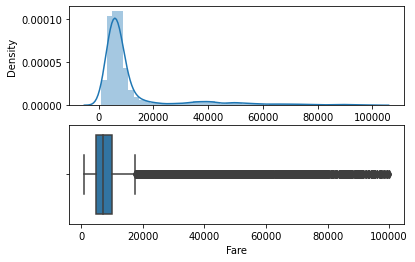

In [86]:
plot(data,'Fare')

In [87]:
data.to_csv('cleaned_data.csv', index = None)

In [88]:
x= data.drop('Fare',axis=1)
y = data['Fare']

## **Feature Selection**

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(x,y)

array([3.72565921, 3.20829067, 3.21040457, 2.64289107, 3.31121201,
       3.97725807, 0.2762763 , 0.25149182, 1.49166456, 1.3184559 ,
       1.57089166, 1.38969862, 1.45801083, 0.79499257, 2.2581936 ])

In [91]:
imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Number Of Stops,3.954703
Source,3.691385
Destination,3.317293
Layover2,3.213893
Layover1,3.196338
Layover3,2.594231
Airline,2.273723
Arrival Time_hour,1.588878
Duration_hour,1.465694
Departure Time_hour,1.462515


In [93]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x = s.fit_transform(x)
print(x.mean())
x.std()

2.1526143018160513e-16


0.9999999999999999

# **Model Training**

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [110]:
def predict(model):
    tr_model = model.fit(x_train,y_train)
    print("Training Score : {}".format(tr_model.score(x_train,y_train)))
    y_prediction = tr_model.predict(x_test)
    print("Predictions are : {}".format(y_prediction))
    print('\n')
    print("Testing Score : {}".format(tr_model.score(x_test, y_test)))
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print("R2 Score : {}".format(r2_score))
    
    print("MAE : ",metrics.mean_absolute_error(y_test,y_prediction))
    print("MSE : ",metrics.mean_squared_error(y_test,y_prediction))
    print("RMSE : ",np.sqrt(metrics.mean_absolute_error(y_test,y_prediction)))

    plt.scatter(y_test, y_prediction, alpha = 0.5 , color ='lightblue')
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()
        
    sns.distplot(y_test-y_prediction)

# **KNN Regressor**

In [99]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Training Score : -53537800.560995825
Predictions are : [ 5708.         10549.33333333  8430.66666667 ...  4142.33333333
 12422.         10224.66666667]


R2 Score : 0.5660481116141931
MAE :  4577.682833333333
MSE :  115134280.2883889
RMSE :  67.6585754604199


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


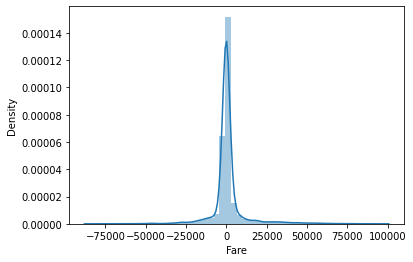

In [100]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
predict(knn_regressor)

In [101]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')


{'n_neighbors': 3}

## **Linear Regression**

Training Score : 0.34464831298598053
Predictions are : [ 8992.15317094  9412.90624721 15943.17576061 ...  4834.52621015
 20031.73035873 11967.59896042]


Testing Score : 0.35154569396481455
R2 Score : 0.3515456939648146
MAE :  7495.205929280411
MSE :  172045154.828066
RMSE :  86.5748573737226


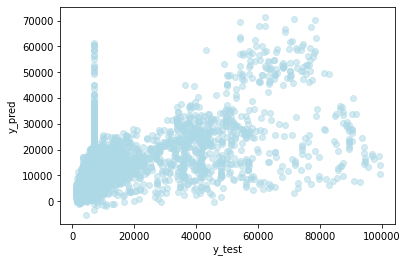

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


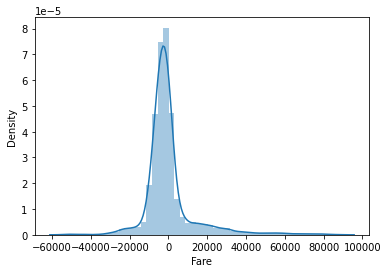

In [111]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

# **Lasso Regression**

In [103]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2220993427978.5977, tolerance: 623790964.5643581
  positive)


Training Score : -8430.008031087575
Predictions are : [ 9972.68627125  9226.56166754 17727.22055645 ...  4459.82782591
 16737.54587892 13109.783842  ]


Testing Score : -8556.231008890012
R2 Score : 0.279515365451395
MAE :  8556.231008890012
MSE :  191155937.04675218
RMSE :  92.49989734529446


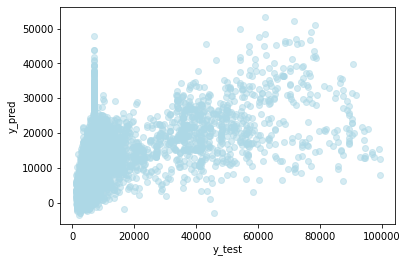

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


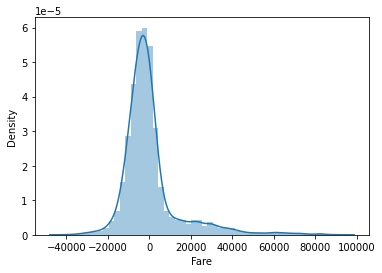

In [112]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
predict(lasso_regressor)

In [117]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


{'alpha': 0.0001}

# **Ridge Regression**

Training Score : -7385.945731879065
Predictions are : [ 8992.18446547  9412.89893741 15943.23408691 ...  4834.51460877
 20031.62025812 11967.6354048 ]


Testing Score : -7495.235092173127
R2 Score : 0.3515451901720341
MAE :  7495.235092173127
MSE :  172045288.4922365
RMSE :  86.57502579943667


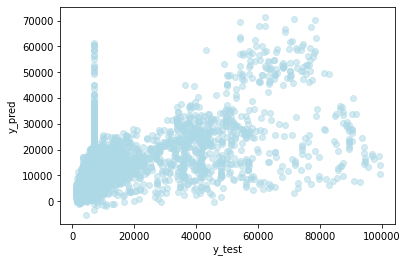

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


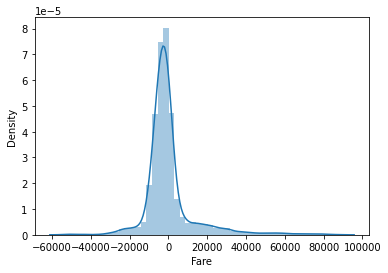

In [114]:
from sklearn.linear_model import Ridge
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =RandomizedSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
predict(ridge_regressor)

In [118]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


{'alpha': 0.0001}

# **Decision Tree Regression**

Training Score : 0.9961167419630453
Predictions are : [ 8412.         10423.42857143  8907.5        ...  4046.
  9361.          7540.        ]


Testing Score : 0.697073806192891
R2 Score : 0.697073806192891
MAE :  2656.87229352892
MSE :  80371096.97625
RMSE :  51.544857100674164


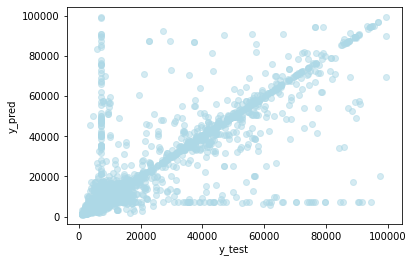

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


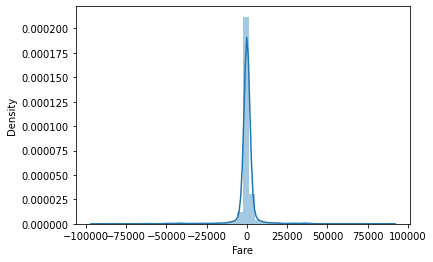

In [119]:
from sklearn.tree import DecisionTreeRegressor
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =5)
predict(tree)

In [120]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 25}

## **Stacking Regressor**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2164407319437.7825, tolerance: 623790964.5643581
  positive)


Training Score : 0.9990151183900539
Predictions are : [ 5392. 10151.  7783. ...  3826. 30515.  7690.]


Testing Score : 0.3610610738511121
R2 Score : 0.3610610738511121
MAE :  5445.661972222223
MSE :  169520574.46743056
RMSE :  73.79472862083188


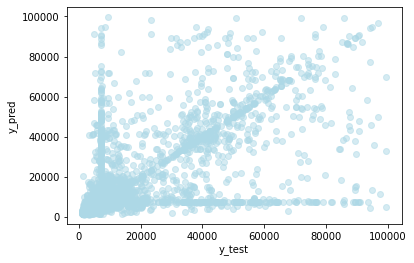

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


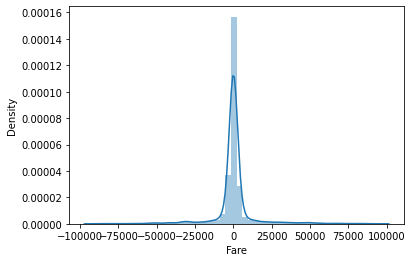

In [134]:
from mlxtend.regressor import StackingRegressor
stack = StackingRegressor(regressors = [Ridge(), Lasso(), KNeighborsRegressor()], meta_regressor = DecisionTreeRegressor())
predict(stack)

# **Random Forest Regressor**

In [122]:
from sklearn.ensemble import RandomForestRegressor

Training Score : -1216.2664026923117
Predictions are : [ 6099.4835119  10481.52882648  9459.86375397 ...  4484.32663095
 10350.00955195  9513.0551627 ]


Testing Score : -2507.0445648411983
R2 Score : 0.8445851055962676
MAE :  2507.0445648411983
MSE :  41234022.69276754
RMSE :  50.07039609231385


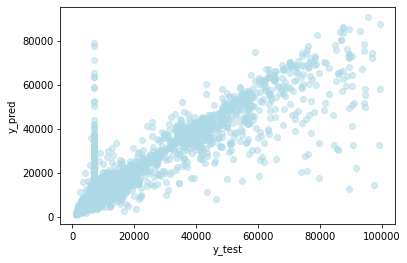

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


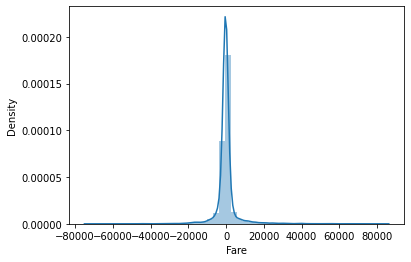

In [123]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10], 'max_features' : ['auto', 'sqrt'] }
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
predict(random_regressor)

In [124]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}